Name : Krishna Kant Verma <br>
Roll No : 2211CS19<br>
Machine Learning Assignment - 1<br>
Implementation of K_means and K_Mediod Clustering Algorithm<br>

# New section

Installation of Scikit-Learn

In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.0 MB/s 


Importing all the required library


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Kmeans Algorithms
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# K mediod Algorithm
from sklearn_extra.cluster import KMedoids
# google collab required library
from google.colab import files
# for plotting the graph
import seaborn as sns

Setting Up and Fetching the DataSet

In [ ]:
# fetching dataset from google drive
# Location : "/content/drive/MyDrive/Clustering_DataSets/Country_Data/Country-data.csv"
dataSetPath="/content/drive/MyDrive/Clustering_DataSets/Country_Data/Country-data.csv"

In [ ]:
# reading the csv file
dataFrame = pd.read_csv(dataSetPath)

In [ ]:
# printing head of the data
dataFrame.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:

# it will shows all the important feature of the datasets
dataFrame.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# cheking all the columns label present in the datasets
dataFrame.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Correlation Matrix of Given Datasets

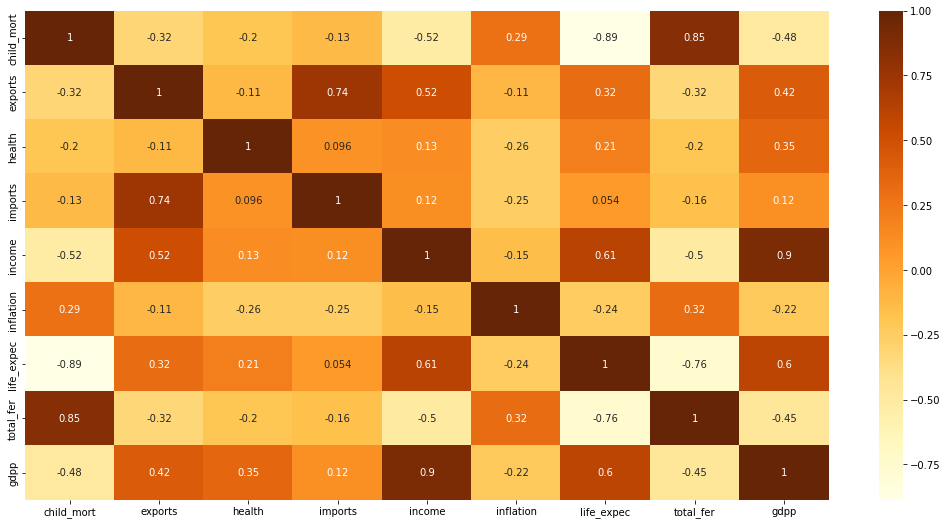

In [ ]:
# printing the correlation matrix of the given datasets
plt.figure(figsize = (18, 9))
sns.heatmap(dataFrame.corr(), annot = True, cmap="YlOrBr")
plt.show()

In [ ]:
dataFrame.info()
## Here There is no NULL Value or Missing Value Found so we can skip the Data Cleaning Step

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# printing the dataframe head
dataFrame.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Scaling the Datasets using StandardScaler

In [ ]:
## using StandardScaler for scalling the data. and converting the data into standard form
scaler=StandardScaler()
scaledDataFrame=scaler.fit_transform(dataFrame.iloc[:,1:])

In [ ]:
# printing scaled dataframe
print(scaledDataFrame)

[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


In [ ]:
# creating dataframe from the numpy array
scaledDataFrame=pd.DataFrame(scaledDataFrame,columns=dataFrame.iloc[:,1:].columns, index=dataFrame.index)

In [ ]:
# printing dataframe for check
scaledDataFrame

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [ ]:
# storing the scaleddata frame values into data for future use
data = scaledDataFrame.values

In [ ]:
# printing the values stored in data
print(data)

[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


Silhoutte Score for Varying Size Cluster for K-Means



Silhouette Score(K-Means)
Silhouettes score/cluster: {2: 0.28735668921406704, 3: 0.28329575683463126, 4: 0.29595170577528157, 5: 0.30440779730752227, 6: 0.2298665641744027, 7: 0.22110886585082007, 8: 0.2441314619143649, 9: 0.21368375460006636, 10: 0.21374812825273304, 11: 0.21805802299611193, 12: 0.2171938566148633, 13: 0.20762366431833917, 14: 0.19799862468851048, 15: 0.17238717267488793, 16: 0.19644373966712877, 17: 0.20892266501877083, 18: 0.1982310743993541, 19: 0.18309281307488} 
 


Text(0, 0.5, 'Silhouette score')

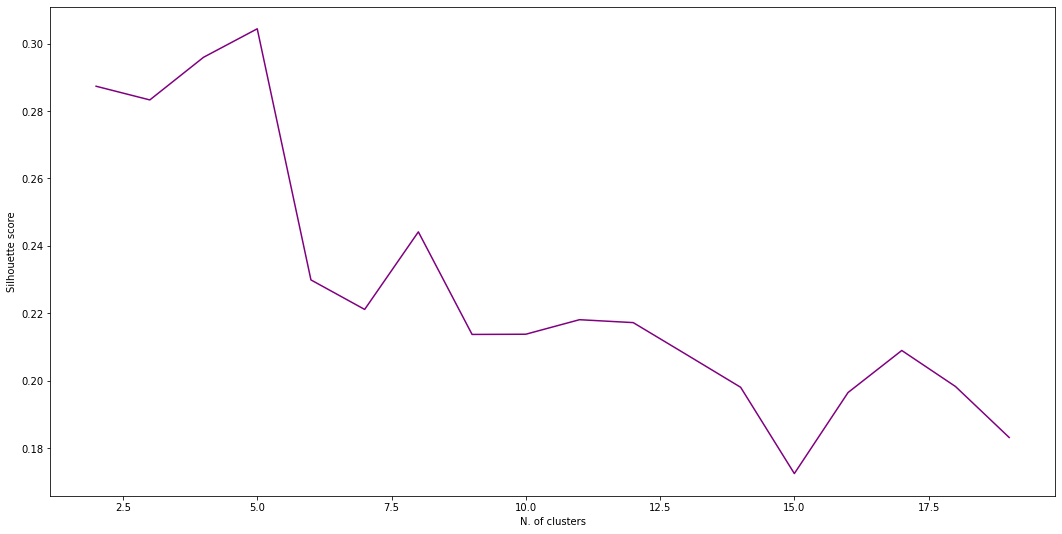

In [ ]:
#Plotting silhouette score for clusters for different cluster size using K-Means
shlt_score_1={}
cluster_range = list(range(2,20,1))
# iterating over all ranges from 2 to 20
for clusterNum in cluster_range:
    kmeans = KMeans(n_clusters=clusterNum,random_state=60,max_iter=50 )
    kmeans.fit(data)
    silhouette_avg = silhouette_score(data, kmeans.labels_)
    shlt_score_1[clusterNum]=silhouette_avg
print("Silhouette Score(K-Means)")
print(f'Silhouettes score/cluster: {shlt_score_1} \n ')
# plotting the graph
plt.figure(figsize=(18, 9))
plt.plot(list(shlt_score_1.keys()),list(shlt_score_1.values()),color='purple')
plt.xlabel('N. of clusters')
plt.ylabel('Silhouette score')

Silhoutte Score for Varying Size Cluster for K-Mediod

Silhouette Score(K-Medoid)
Silhouettes score/cluster: {2: 0.28463920760041944, 3: 0.2810419153107105, 4: 0.20543215582508137, 5: 0.18601878484175516, 6: 0.19196908487478345, 7: 0.19990295276214917, 8: 0.19950359231443354, 9: 0.22640408021206157, 10: 0.19517013557913504, 11: 0.19568444843340146, 12: 0.16657689027469175, 13: 0.17691817191896503, 14: 0.17497463345623177, 15: 0.16657547498001485, 16: 0.16522094518657915, 17: 0.1763630290175464, 18: 0.17584526756418262, 19: 0.19040816102180824} 
 


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:247: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Text(0, 0.5, 'Silhouette score')

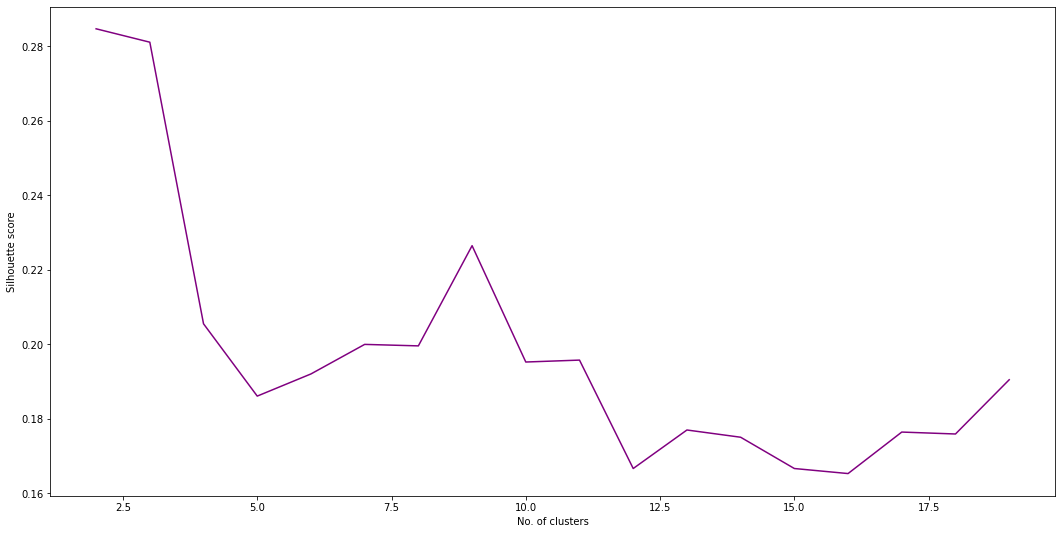

In [ ]:
#Plotting silhouette score for clusters of different sizes using K-Medoid
shlt_score_2={}
cluster_range = list(range(2,20,1))
# iterating over all ranges from 2 to 20
for clusterNum in cluster_range:
    kmedoids = KMedoids(n_clusters=clusterNum,random_state=0, method="pam" ,max_iter=20)
    kmedoids.fit(data)
    silhouette_avg = silhouette_score(data, kmedoids.labels_)
    shlt_score_2[clusterNum]=silhouette_avg

print("Silhouette Score(K-Medoid)")
print(f'Silhouettes score/cluster: {shlt_score_2} \n ')
# plotting the graph
plt.figure(figsize=(18, 9))
plt.plot(list(shlt_score_2.keys()),list(shlt_score_2.values()),color='purple')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette score')

Applying K-Means Clustering Algorithm

In [ ]:
# K-Means for 3-clusters
kmeans = KMeans(n_clusters=3, random_state= 30,max_iter=50)
kmeans.fit(data)
print(f'Cluster Labels: {kmeans.labels_}')

Cluster Labels: [0 1 1 0 1 1 1 2 2 1 1 2 1 1 1 2 1 0 1 1 1 0 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 1 0 1 1 1 1 1 2 2 1 1 0 1 1 0 1 1 0 2 2 2 1 0 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


In [ ]:
#Silhouette score for 3-clusters
shlt_score_kmeans= silhouette_score(data, kmeans.labels_)
print(f'Silhouette Score for K-Means: {shlt_score_kmeans}')
kmeans.labels_
labels = kmeans.labels_
country = dataFrame.iloc[:,0]
clusters1=pd.DataFrame({'country':country,'label':labels})
dataFrame_kmeans = scaledDataFrame
dataFrame_kmeans['label']=labels
clusters1

Silhouette Score for K-Means: 0.28329575683463126


,country,label
0,Afghanistan,0
1,Albania,1
2,Algeria,1
3,Angola,0
4,Antigua and Barbuda,1
...,...,...
162,Vanuatu,1
163,Venezuela,1
164,Vietnam,1
165,Yemen,0


Applying K-Mediod Clustering Algorithm

In [ ]:
#Applying K-Medoid for 3-clusters
kmedoids = KMedoids(n_clusters=3, random_state=20,method="pam")
kmedoids.fit(data)
print(f' Labels: {kmedoids.labels_}')

 Labels: [1 0 0 1 0 0 0 2 2 0 2 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 1 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 0 0 2 0 1 0 2 0 0 1 0 2 2 1 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [ ]:
#Silhouette score for 3-clusters
shlt_score_kmed= silhouette_score(data, kmedoids.labels_)
print(f' Silhouette Score for K-Medoids: {shlt_score_kmed}')

kmedoids.labels_
labels = kmedoids.labels_
print(labels)
clusters2=pd.DataFrame({'country':country,'label':labels})
clusters2
dataFrame_kmed = scaledDataFrame
dataFrame_kmed['label']=labels
dataFrame_kmed

 Silhouette Score for K-Medoids: 0.2810419153107105
[1 0 0 1 0 0 0 2 2 0 2 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 1 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 0 0 2 0 1 0 2 0 0 1 0 2 2 1 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,0
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


Description of the cluster formed using both the algorithms

In [ ]:
#Description of every cluster formed using K-Means
description = dataFrame_kmeans.groupby("label")['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'label']
clientsNum = description.size()
description = description.mean()
description['clientsNum'] = clientsNum
print(description)

       child_mort   exports    health   imports    income  inflation  \
label                                                                  
0       -0.472471  0.180039 -0.182204  0.195956 -0.142839  -0.058905   
1        1.287436 -0.487336 -0.215439 -0.227488 -0.690505   0.393815   
2       -0.822555  0.308090  0.854023 -0.163043  1.527646  -0.486377   

       life_expec  total_fer      gdpp  label  clientsNum  
label                                                      
0        0.327162  -0.474677 -0.284471    0.0          85  
1       -1.206656   1.249291 -0.608558    1.0          51  
2        1.088088  -0.753750  1.781175    2.0          31  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
#Description of all the  cluster formed using K-Medoid
description = dataFrame_kmed.groupby("label")['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'label']
clientsNum = description.size()
description = description.mean()
description['clientsNum'] = clientsNum
print(description)

       child_mort   exports    health   imports    income  inflation  \
label                                                                  
0       -0.472471  0.180039 -0.182204  0.195956 -0.142839  -0.058905   
1        1.287436 -0.487336 -0.215439 -0.227488 -0.690505   0.393815   
2       -0.822555  0.308090  0.854023 -0.163043  1.527646  -0.486377   

       life_expec  total_fer      gdpp  label  clientsNum  
label                                                      
0        0.327162  -0.474677 -0.284471    0.0          85  
1       -1.206656   1.249291 -0.608558    1.0          51  
2        1.088088  -0.753750  1.781175    2.0          31  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Plotting Scatter Plot for Both the Clustering Algorithm

<function matplotlib.pyplot.show(*args, **kw)>

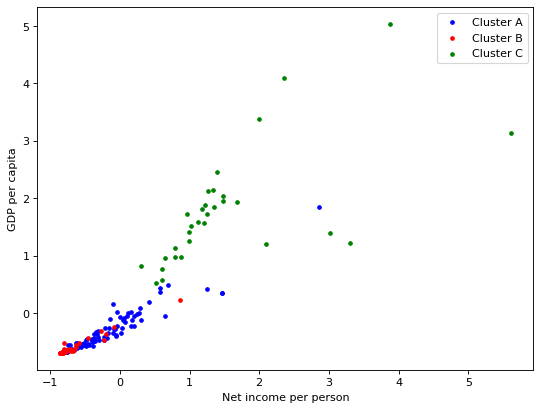

In [ ]:
#Scatter plot for K-means
dataFrame0 = dataFrame_kmeans[dataFrame_kmeans['label'] == 0]
dataFrame1 = dataFrame_kmeans[dataFrame_kmeans['label'] == 1]
dataFrame2 =dataFrame_kmeans[dataFrame_kmeans['label'] == 2]
# plotting the graph
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataFrame0['income'], dataFrame0['gdpp'], c='blue', s=10, label='Cluster A')
plt.scatter(dataFrame1['income'], dataFrame1['gdpp'], c='red', s=10, label='Cluster B')
plt.scatter(dataFrame2['income'], dataFrame2['gdpp'], c='green', s=10, label='Cluster C')
# assigning labels to the axis
plt.xlabel('Net income per person')
plt.ylabel('GDP per capita')
plt.legend(),
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

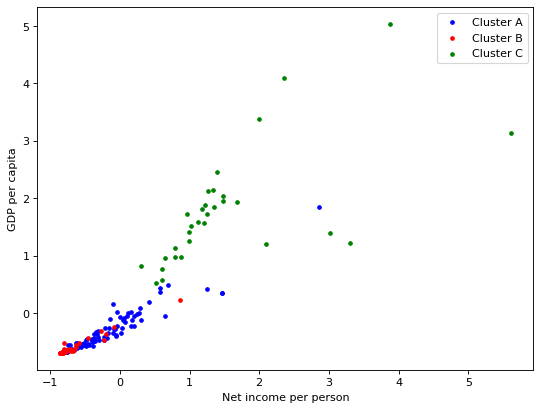

In [ ]:
#Scatter plot for K-mediod
dataFrame0 = dataFrame_kmed[dataFrame_kmed['label'] == 0]
dataFrame1 = dataFrame_kmed[dataFrame_kmed['label'] == 1]
dataFrame2 = dataFrame_kmed[dataFrame_kmed['label'] == 2]

# plotting the graph
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataFrame0['income'], dataFrame0['gdpp'], c='blue', s=10, label='Cluster A')
plt.scatter(dataFrame1['income'], dataFrame1['gdpp'], c='red', s=10, label='Cluster B')
plt.scatter(dataFrame2['income'], dataFrame2['gdpp'], c='green', s=10, label='Cluster C')
# assigning labels to the axis
plt.xlabel('Net income per person')
plt.ylabel('GDP per capita')
plt.legend(),
plt.show

Plotting Pair-Plot of Using Both Algorithm

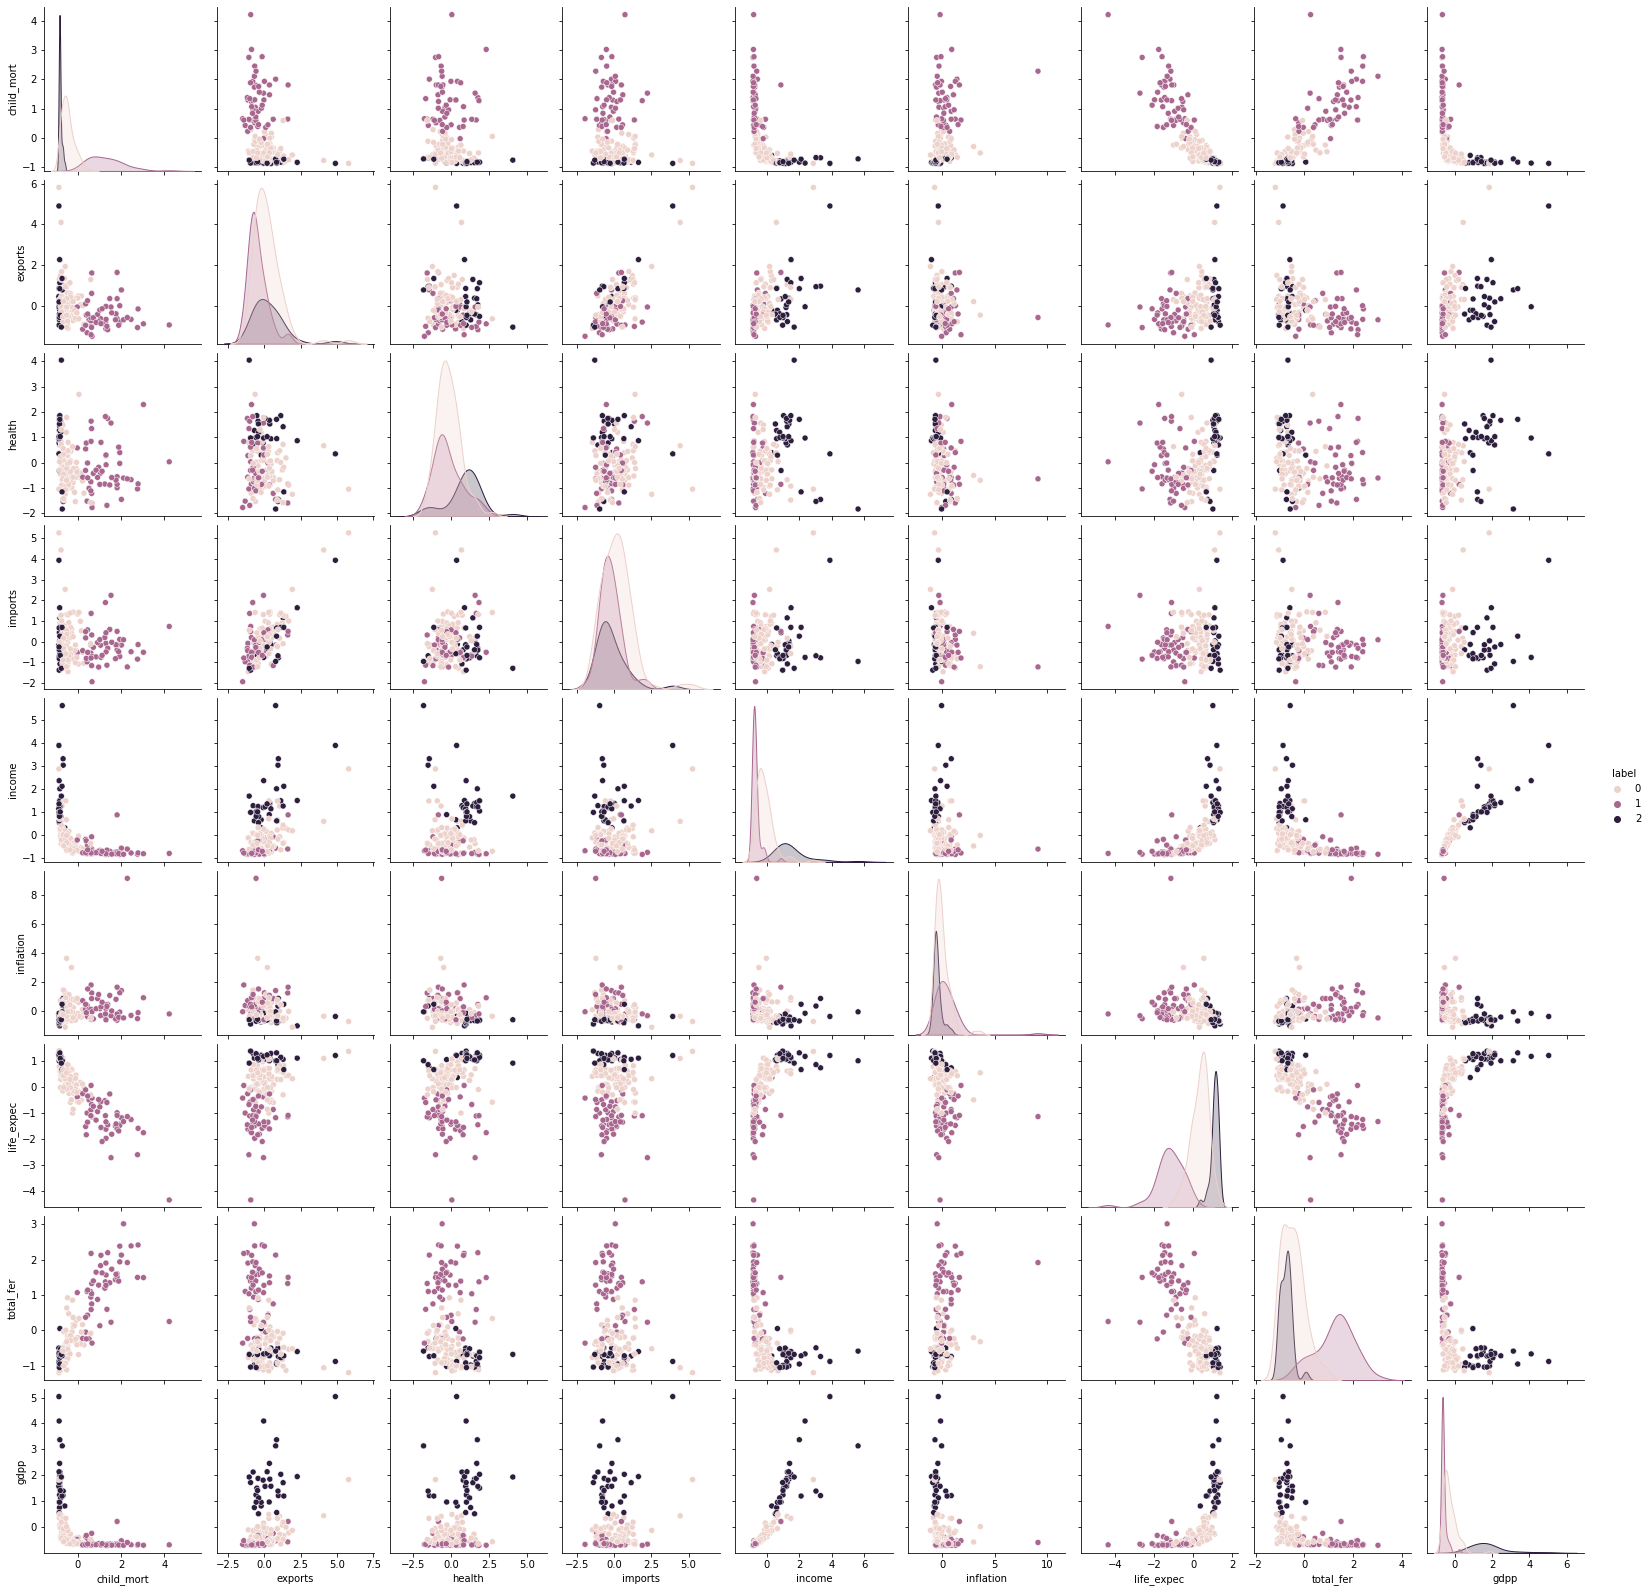

In [ ]:
# pair plot for k-means clustering
sns.pairplot(dataFrame_kmeans, hue='label')

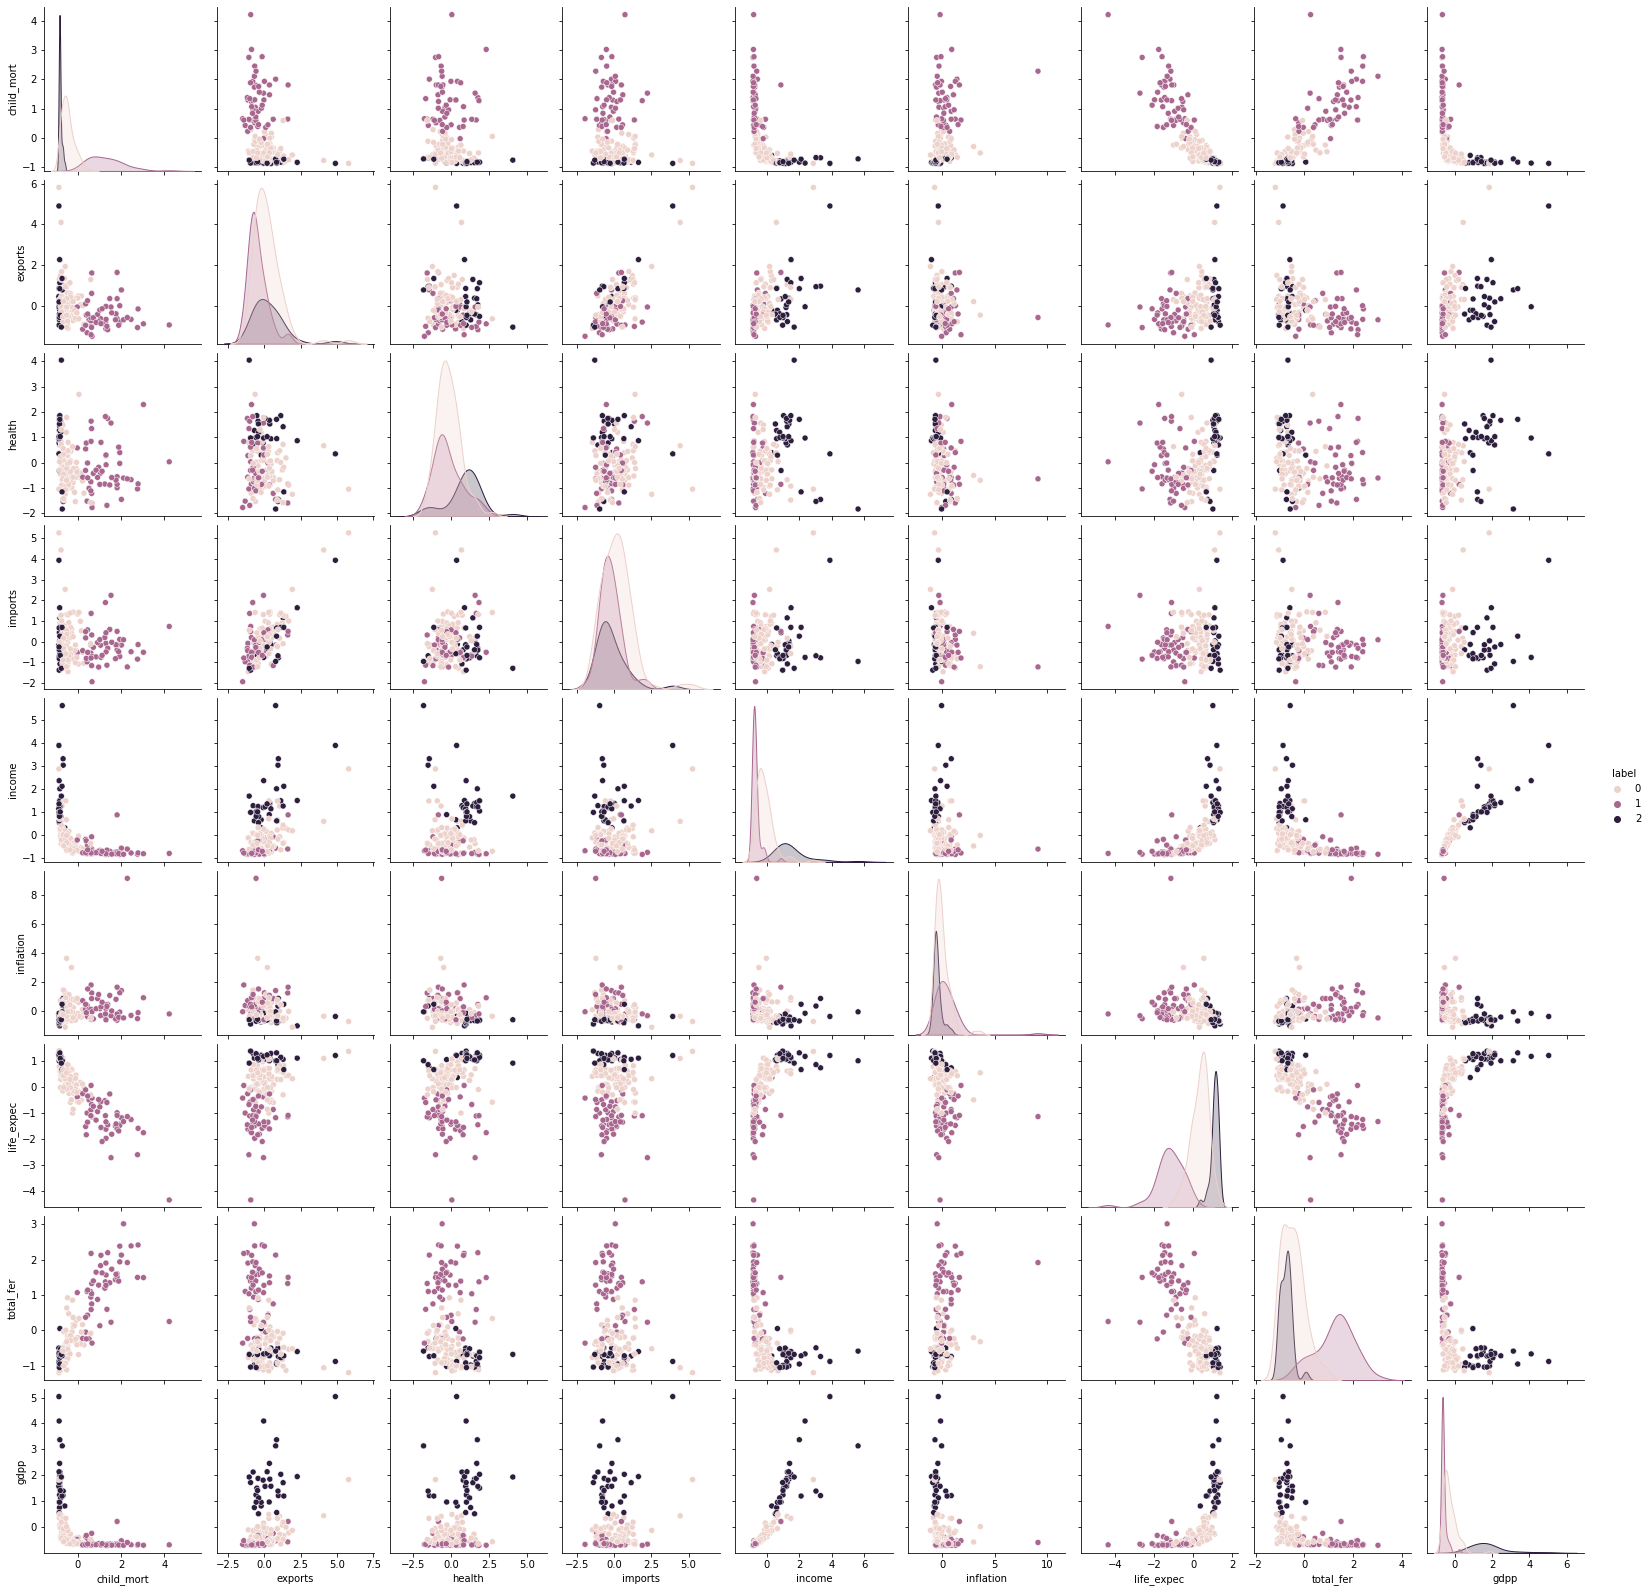

In [ ]:
# pair plot fot k-mediod clustering
sns.pairplot(dataFrame_kmed, hue='label')

In [ ]:
# printing the head of the the k-measns dataframe
dataFrame_kmeans.head(20)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
5,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791,0
6,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233,0
7,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699,2
8,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082,2
9,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857,0


Count of the Country clustered in Each cluster

In [ ]:
# for K-means
dataFrame_kmeans.label.value_counts()

0    85
1    51
2    31
Name: label, dtype: int64

In [ ]:
# for k-mediod
dataFrame_kmed.label.value_counts()

0    85
1    51
2    31
Name: label, dtype: int64

Setting the DataFrames

In [ ]:
print(dataFrame)
extracted_col = dataFrame["country"]
print(extracted_col)
# dataFrame_kmeans.insert(0,"country",extracted_col)
# dataFrame_kmed.insert(0,"country",extracted_col)
dataFrame_kmeans


                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49   

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,0
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1
